**先导入numpy库以np为别名**

In [1]:
import numpy as np

**创建一个数组来演示numpy的ndarray类型参数**

In [65]:
a = np.array([1,2,3,4,5,6,7,8,9], dtype = int, copy = True, order = None, subok = False, ndmin = 2)

- 这里的dtype指的是数组包含的数据的类型
 - 类型包括:
|名称|描述|
|:--:|:--:|
bool_	|布尔型数据类型（True 或者 False）
int_	|默认的整数类型（类似于 C 语言中的 long，int32 或 int64）
intc	|与 C 的 int 类型一样，一般是 int32 或 int 64
intp	|用于索引的整数类型（类似于 C 的 ssize_t，一般情况下仍然是 int32 或 int64）
int8	|字节（-128 to 127）
int16	|整数（-32768 to 32767）
int32	|整数（-2147483648 to 2147483647）
int64	|整数（-9223372036854775808 to 9223372036854775807）
uint8	|无符号整数（0 to 255）
uint16	|无符号整数（0 to 65535）
uint32	|无符号整数（0 to 4294967295）
uint64	|无符号整数（0 to 18446744073709551615）
float_	|float64 类型的简写
float16	|半精度浮点数，包括：1 个符号位，5 个指数位，10 个尾数位
float32	|单精度浮点数，包括：1 个符号位，8 个指数位，23 个尾数位
float64	|双精度浮点数，包括：1 个符号位，11 个指数位，52 个尾数位
complex_	|complex128 类型的简写，即 128 位复数
complex64	|复数，表示双 32 位浮点数（实数部分和虚数部分）
complex128	|复数，表示双 64 位浮点数（实数部分和虚数部分）

- copy指的是是否可以复制
- subok指的是是否默认返回一个与基类类型一致的数组
- ndmin指的是创建的数组的维数

order = "C" 行优先

order = "F" 列优先

In [9]:
b=np.mat([1,2,3,4])
print(type(b))

st=np.array(b,subok=True)
sf=np.array(b) #默认为False

print('subok为True时st的类型:',type(st))
print('subok为False时sf的类型:',type(sf))
print(id(sf),id(b))

<class 'numpy.matrix'>
subok为True时st的类型: <class 'numpy.matrix'>
subok为False时sf的类型: <class 'numpy.ndarray'>
2223156314736 2223156344976


**NumPy 数组的维数称为秩（rank），秩就是轴的数量，即数组的维度，一维数组的秩为 1，二维数组的秩为 2，以此类推。**
**在 NumPy中，每一个线性的数组称为是一个轴（axis），也就是维度（dimensions）。**
**比如说，二维数组相当于是两个一维数组，其中第一个一维数组中每个元素又是一个一维数组。**
**所以一维数组就是 NumPy 中的轴（axis），第一个轴相当于是底层数组，第二个轴是底层数组里的数组。**
**而轴的数量——秩，就是数组的维数。**

|属性|说明|
|:--:|:--:|
ndarray.ndim	|秩，即轴的数量或维度的数量
ndarray.shape	|数组的维度，对于矩阵，n 行 m 列
ndarray.size	|数组元素的总个数，相当于 .shape 中 n*m 的值
ndarray.dtype	|ndarray 对象的元素类型
ndarray.itemsize	|ndarray 对象中每个元素的大小，以字节为单位
ndarray.flags	|ndarray 对象的内存信息
ndarray.real	|ndarray元素的实部
ndarray.imag	|ndarray 元素的虚部
ndarray.data	|包含实际数组元素的缓冲区，由于一般通过数组的索引获取元素，所以通常不需要使用这个属性。

In [67]:
print(a.ndim,a.shape,a.size,a.dtype,a.itemsize)

2 (1, 9) 9 int32 4


**numpy有多种方式创建数组如:**

In [ ]:
numpy.empty(shape, dtype = float)#数组元素为随机值
numpy.zeros(shape, dtype = float)#数组元素为0
numpy.ones(shape, dtype = None)#数组元素为1
numpy.asarray(a, dtype = None)#从已有的数组创建数组  输入任意形式的参数，可以是列表, 列表的元组, 元组, 元组的元组, 元组的列表，多维数组
numpy.arange(start, stop, step, dtype)#从数值范围创建数组
np.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)#创建等差数列
np.logspace(start, stop, num=50, endpoint=True, base=10.0, dtype=None)#创建等比数列

**NumPy 切片和索引**

In [81]:
b = a
b = a[...]
b

array([[1, 2, 3, 4, 5, 6, 7, 8, 9]])

**NumPy 广播(Broadcast)**

广播(Broadcast)是 numpy 对不同形状(shape)的数组进行数值计算的方式， 对数组的算术运算通常在相应的元素上进行。

如果两个数组 a 和 b 形状相同，即满足 a.shape == b.shape，那么 a*b 的结果就是 a 与 b 数组对应位相乘。这要求维数相同，且各维度的长度相同。

当运算中的 2 个数组的形状不同时，numpy 将自动触发广播机制

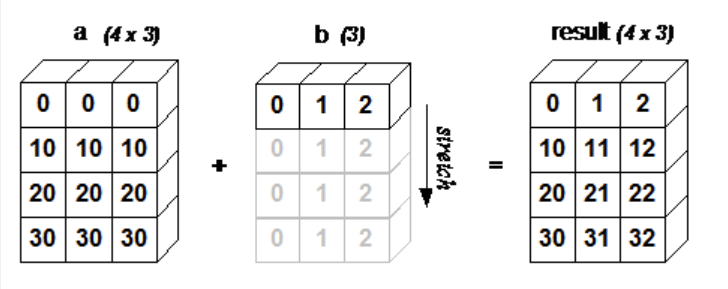

广播的规则:

- 让所有输入数组都向其中形状最长的数组看齐，形状中不足的部分都通过在前面加 1 补齐。
- 输出数组的形状是输入数组形状的各个维度上的最大值。
- 如果输入数组的某个维度和输出数组的对应维度的长度相同或者其长度为 1 时，这个数组能够用来计算，否则出错。
- 当输入数组的某个维度的长度为 1 时，沿着此维度运算时都用此维度上的第一组值。

**NumPy 迭代数组**

In [8]:
import numpy as np
 
a = np.arange(6).reshape(2,3)
print ('原始数组是：')
print (a)
print ('\n')
print ('迭代输出元素：')
for x in np.nditer(a):
    print (x, end=", " )
print ('\n')

原始数组是：
[[0 1 2]
 [3 4 5]]


迭代输出元素：
0, 1, 2, 3, 4, 5, 



In [9]:
import numpy as np
 
a = np.arange(6).reshape(2,3)
for x in np.nditer(a.T):
    print (x, end=", " )
print ('\n')
 
for x in np.nditer(a.T.copy(order='C')):
    print (x, end=", " )
print ('\n')

0, 1, 2, 3, 4, 5, 

0, 3, 1, 4, 2, 5, 



In [85]:
import numpy as np 
a = np.arange(0,60,5) 
a = a.reshape(3,4)  
print ('原始数组是：')
print (a)
print ('\n')
print ('修改后的数组是：')
for x in np.nditer(a, flags =  ['c_index'], order =  'C'):  
   print (x, end=", " )

原始数组是：
[[ 0  5 10 15]
 [20 25 30 35]
 [40 45 50 55]]


修改后的数组是：
0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 

**广播迭代**

In [86]:
a = np.arange(0,60,5) 
a = a.reshape(3,4)  
print  ('第一个数组为：')
print (a)
print  ('\n')
print ('第二个数组为：')
b = np.array([1,  2,  3,  4], dtype =  int)  
print (b)
print ('\n')
print ('修改后的数组为：')
for x,y in np.nditer([a,b]):  
    print ("%d:%d"  %  (x,y), end=", " )

第一个数组为：
[[ 0  5 10 15]
 [20 25 30 35]
 [40 45 50 55]]


第二个数组为：
[1 2 3 4]


修改后的数组为：
0:1, 5:2, 10:3, 15:4, 20:1, 25:2, 30:3, 35:4, 40:1, 45:2, 50:3, 55:4, 

In [1]:
!dir

 驱动器 D 中的卷是 Data
 卷的序列号是 ACC5-7B31

 D:\桌面\mycode\py\notebook 的目录

2022/12/24  00:00    <DIR>          .
2022/12/23  14:57    <DIR>          ..
2022/11/26  15:07                95 .bashrc
2022/12/17  19:31             4,839 .bash_history
2022/11/25  16:34                99 .bash_profile
2022/12/23  14:26                25 .condarc
2022/11/25  16:34                72 .gitconfig
2022/12/23  23:36    <DIR>          .ipynb_checkpoints
2022/12/17  19:31                20 .lesshst
2022/11/25  14:43                43 .minttyrc
2022/12/09  15:43             3,695 .viminfo
2022/12/12  19:53               242 data.txt
2022/12/16  20:25           126,118 game.ico
2022/12/23  23:34           129,958 matplot_lib.ipynb
2022/12/23  18:00            93,910 num_py.ipynb
2022/12/21  16:22            32,817 opencv.ipynb
2022/10/25  15:33               902 Untitled.ipynb
2022/11/19  23:51               867 Untitled1.ipynb
2022/11/23  00:20             2,049 Untitled10.ipynb
2022/11/24  00:16             1

In [4]:
# %load D:\桌面\mycode\py\杨辉三角.py
a = input("请输入行数:")
b = []
v = []
for i in range(0, int(a)):
    b.append(0)
    v.append(0)
b[0] = 1
v[0] = 1
for j in range(1, int(a)+1):
    if j % 2 == 0:
        for x in range(1, int(j)+1):
            if x == 1:
                m = 1
            else:
                m = b[x-2] + b[x-1]
            print(m, " ", end="")
            v[x-1] = m
    else:
        for y in range(1, int(j)+1):
            if y == 1:
                m = 1
            else:
                m = v[y-2] + v[y-1]
            print(m, " ", end="")
            b[y-1] = m
    print("\n")



请输入行数:6
1  

1  1  

1  2  1  

1  3  3  1  

1  4  6  4  1  

1  5  10  10  5  1  



In [5]:
%run D:\桌面\mycode\py\杨辉三角.py

请输入行数:6
1  

1  1  

1  2  1  

1  3  3  1  

1  4  6  4  1  

1  5  10  10  5  1  



In [21]:
for i,j in enumerate([1,2,3,4,5,6]):
    print(i,j)
a = np.array([1,2,3])
b = a.copy()
b.fill(1)
print(a,(a-b)[1:],b)

0 1
1 2
2 3
3 4
4 5
5 6
[1 2 3] [1 2] [1 1 1]


SyntaxError: unexpected EOF while parsing (1029113995.py, line 1)